In [2]:
!unzip '/content/projectfile.zip'

unzip:  cannot find or open /content/projectfile.zip, /content/projectfile.zip.zip or /content/projectfile.zip.ZIP.


In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_c = pd.read_csv("/content/drive/MyDrive/Project_DBDA/courses.csv")

In [ ]:
df_c.head()

,id,title,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image
0,567828,The Complete Python Bootcamp From Zero to Hero...,/course/complete-python-bootcamp/,4.592782,452973,155,2015-07-29T00:12:23Z,2021-03-14,22 total hours,9685726,https://img-c.udemycdn.com/course/750x422/5678...
1,1565838,The Complete 2023 Web Development Bootcamp,/course/the-complete-web-development-bootcamp/,4.667258,263152,490,2018-02-22T12:02:33Z,2023-01-20,65.5 total hours,31334738,https://img-c.udemycdn.com/course/750x422/1565...
2,625204,The Web Developer Bootcamp 2023,/course/the-web-developer-bootcamp/,4.696147,254711,616,2015-09-28T21:32:19Z,2023-02-12,64 total hours,4466306,https://img-c.udemycdn.com/course/750x422/6252...
3,756150,Angular - The Complete Guide (2023 Edition),/course/the-complete-guide-to-angular-2/,4.592692,180257,472,2016-02-08T17:02:55Z,2023-02-06,34.5 total hours,13952972,https://img-c.udemycdn.com/course/750x422/7561...
4,2776760,100 Days of Code: The Complete Python Pro Boot...,/course/100-days-of-code/,4.695252,177568,676,2020-01-24T10:47:21Z,2022-11-30,64 total hours,31334738,https://img-c.udemycdn.com/course/750x422/2776...


In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83104 entries, 0 to 83103
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      83104 non-null  int64  
 1   title                   83104 non-null  object 
 2   url                     83104 non-null  object 
 3   rating                  83104 non-null  float64
 4   num_reviews             83104 non-null  int64  
 5   num_published_lectures  83104 non-null  int64  
 6   created                 83104 non-null  object 
 7   last_update_date        83026 non-null  object 
 8   duration                83104 non-null  object 
 9   instructors_id          83104 non-null  int64  
 10  image                   83104 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 7.0+ MB


In [ ]:
numerical_features = ['rating', 'num_reviews', 'num_published_lectures', 'duration']
df_cn = df_c[numerical_features]

In [ ]:
df_cn.describe()

,rating,num_reviews,num_published_lectures
count,83104.000000,83104.000000,83104.000000
mean,4.024024,432.482131,41.189028
std,1.165697,3959.906512,54.618540
min,0.000000,0.000000,0.000000
25%,3.954133,9.000000,13.000000
50%,4.359388,36.000000,25.000000
75%,4.623386,135.000000,48.000000
max,5.000000,452973.000000,891.000000


In [ ]:
df_cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83104 entries, 0 to 83103
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rating                  83104 non-null  float64
 1   num_reviews             83104 non-null  int64  
 2   num_published_lectures  83104 non-null  int64  
 3   duration                83104 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.5+ MB


In [ ]:
df_cn[df_cn["duration"].str.contains("questions")]

,rating,num_reviews,num_published_lectures,duration
546,4.713131,3276,0,335 questions
557,4.619030,3190,0,279 questions
1249,4.497761,1218,0,159 questions
2141,4.541392,558,0,239 questions
2789,4.577136,364,0,180 questions
...,...,...,...,...
79384,4.658982,8,0,157 questions
79685,4.306122,4,0,144 questions
80378,0.000000,0,0,25 questions
82426,5.000000,2,0,155 questions


In [ ]:
print(df_cn[df_cn["duration"].str.contains("questions")].value_counts().sum())
print(df_cn[df_cn["duration"].str.contains("total hours")].value_counts().sum())
print(df_cn[df_cn["duration"].str.contains("total mins")].value_counts().sum())

2212
63399
6066


In [ ]:
df_cn = df_cn[~df_cn["duration"].str.contains("questions")]

In [ ]:
df_cn[df_cn["duration"].str.split(" ").str.len() <= 1]

,rating,num_reviews,num_published_lectures,duration
14254,3.596311,63,0,0
19595,4.461828,7,0,0
22561,3.809053,22,0,0
24155,5.000000,3,0,0
29392,0.000000,0,0,0
52128,0.000000,0,0,0
59278,5.000000,1,0,0
63547,5.000000,1,0,0
63583,0.000000,0,0,0
73041,0.000000,0,0,0


In [ ]:
df_cn = df_cn[df_cn["duration"].str.split(" ").str.len() > 1]

In [ ]:
df_cn.dropna(subset=['duration'], inplace=True)

In [ ]:
duration_strings = df_cn['duration'].str.extract(r'(\D+)')
print(duration_strings[0].unique())

[' total hours' '.' ' total hour']


In [ ]:
duration_mins = (df_cn[df_cn["duration"]\
      .str.contains("mins")]["duration"]\
      .str.split(" ").str[0].astype("float32") / 60).astype("str")

dm_vals = duration_mins.values
dm_ind = duration_mins.index

df_cn.loc[dm_ind, 'duration'] = dm_vals

In [ ]:
duration_hours = df_cn[df_cn["duration"]\
      .str.contains("hour")]["duration"]\
      .str.split(" ").str[0]

dh_vals = duration_hours.values
dh_ind = duration_hours.index

df_cn.loc[dh_ind, 'duration'] = dh_vals

In [ ]:
df_cn[df_cn["duration"].str.split(" ").str.len() > 1].sum()


rating                    0.0
num_reviews               0.0
num_published_lectures    0.0
duration                  0.0
dtype: float64

In [ ]:
df_cn['duration'] = df_cn['duration'].astype("float64")
df_cn.rename(columns = {'duration':'duration_hr'}, inplace = True)

In [ ]:
df_cn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80881 entries, 0 to 83103
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rating                  80881 non-null  float64
 1   num_reviews             80881 non-null  int64  
 2   num_published_lectures  80881 non-null  int64  
 3   duration_hr             80881 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 5.1 MB


feature engineering

In [ ]:
df_cn["num_reviews_per_published_lecture"] = df_cn["num_reviews"] / df_cn["num_published_lectures"]
df_cn["num_reviews_per_hour"] = df_cn["num_reviews"] / df_cn["duration_hr"]

In [ ]:
X = df_cn.drop("rating", axis = 1)
y = df_cn["rating"]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_col_names = list(X.columns)
X_scaled = pd.DataFrame(X_scaled, columns=X_col_names)

X_scaled.head()

,num_reviews,num_published_lectures,duration_hr,num_reviews_per_published_lecture,num_reviews_per_hour
0,112.888603,2.051343,2.215167,56.476997,29.890329
1,65.536046,8.150084,7.851492,10.232128,5.709241
2,63.430363,10.443939,7.657136,7.836812,5.654190
3,44.857142,7.822391,3.834801,7.224351,7.470798
4,44.186347,11.536251,7.657136,4.912925,3.895396


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.60, random_state = 26)

**XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor


model = XGBRegressor(n_estimators=100, random_state=26)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=26, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5

print("Root Mean Squared Error", rmse)
print("Mean Squared Error", mse)
print("Mean Absolute Error", mae)

Root Mean Squared Error 0.4803583222833158
Mean Squared Error 0.2307441177868419
Mean Absolute Error 0.3434606724214763


In [ ]:
print("TRAIN SCORE:", model.score(X_train, y_train))

TRAIN SCORE: 0.8582332358479208


In [ ]:
print("TEST SCORE:", model.score(X_test, y_test))

TEST SCORE: 0.8263548503160365


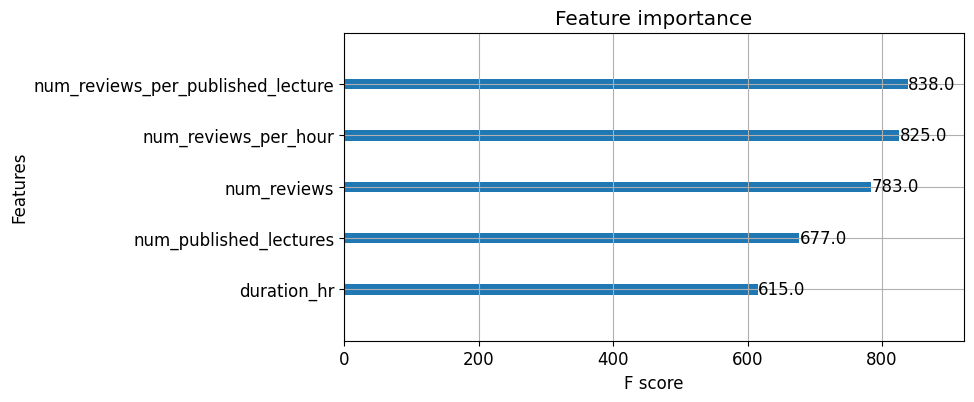

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(figsize=(8,4))
plot_importance(model, max_num_features=8, ax=ax)
plt.show();

In [ ]:
model.save_model('model.h5')

**RandomForest Regressor**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
# Fit the model on the training data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict the ratings on the test data
y_pred = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.35
R-squared: 0.84


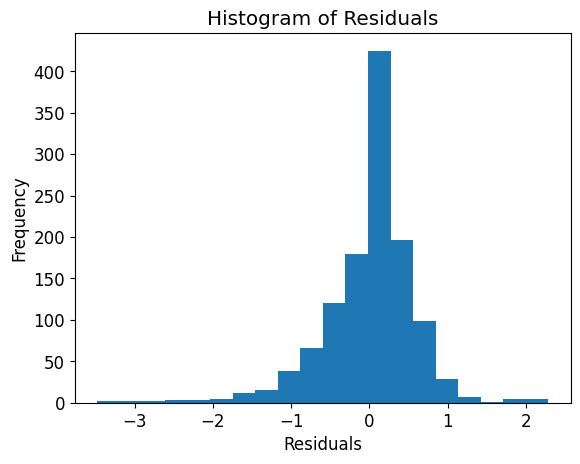

In [ ]:
residuals = y_test - y_pred

plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


**L1 Regularization**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
lasso = Lasso(alpha=0.01)

In [ ]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
y_pred_lasso = lasso.predict(X_test)

In [ ]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Mean Squared Error: {mse_lasso:.2f}")

Lasso Mean Squared Error: 2.27


**L2 Regularization**



In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
ridge = Ridge(alpha=1.0)

In [ ]:
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
y_pred_ridge = ridge.predict(X_test)


In [ ]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Mean Squared Error: {mse_ridge:.2f}")

Ridge Mean Squared Error: 2.27


**DecisionTree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
regressor = DecisionTreeRegressor(random_state=42)


In [ ]:
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.54
R-squared: 0.76


In [ ]:
df_cn.to_csv('D:\Project\courses.csv', index=False)

In [ ]:
instructors=pd.read_csv('/content/instructors.csv')
courses=pd.read_csv('/content/courses.csv')

In [ ]:
print('Instructor :',instructors.shape)
print('Courses :',courses.shape)

Instructor : (32233, 10)
Courses : (83104, 11)


In [ ]:
instructors.dtypes

_class           object
id                int64
title            object
name             object
display_name     object
job_title        object
image_50x50      object
image_100x100    object
initials         object
url              object
dtype: object

In [ ]:
courses=courses[['id', 'title','rating', 'num_reviews', 'num_published_lectures',
       'created', 'last_update_date', 'instructors_id']]

instructors=instructors[['id', 'title', 'name', 'job_title']]

In [ ]:
Udemy_df=pd.merge(courses,instructors,left_on='instructors_id',right_on='id')

In [ ]:
Udemy_df.to_csv('D:\Project\Merged.csv', index=False)

In [ ]:
Udemy_df.rename(columns={'id_x':'id','title_x':'courses','title_y':'full_name'},inplace=True)
Udemy_df.drop('id_y',axis=1,inplace=True)

In [ ]:
Udemy_df.head()

,id,courses,rating,num_reviews,num_published_lectures,created,last_update_date,instructors_id,full_name,name,job_title
0,567828,The Complete Python Bootcamp From Zero to Hero...,4.592782,452973,155,2015-07-29T00:12:23Z,2021-03-14,9685726,Jose Portilla,Jose,Head of Data Science at Pierian Training
1,903744,Python for Data Science and Machine Learning B...,4.622137,126984,165,2016-07-13T05:22:58Z,2020-05-03,9685726,Jose Portilla,Jose,Head of Data Science at Pierian Training
2,822444,Python and Django Full Stack Web Developer Boo...,4.440449,46528,198,2016-04-15T03:19:00Z,2019-09-04,9685726,Jose Portilla,Jose,Head of Data Science at Pierian Training
3,980798,Spark and Python for Big Data with PySpark,4.541236,20838,67,2016-10-10T21:19:56Z,2020-05-31,9685726,Jose Portilla,Jose,Head of Data Science at Pierian Training
4,396876,Learning Python for Data Analysis and Visualiz...,4.323516,18789,110,2015-01-18T00:43:49Z,2019-09-04,9685726,Jose Portilla,Jose,Head of Data Science at Pierian Training


In [ ]:
Udemy_df.shape

(83104, 11)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Udemy_df['created']=pd.to_datetime(Udemy_df['created'])
Udemy_df['last_update_date']=pd.to_datetime(Udemy_df['last_update_date'])
Udemy_df['created_date']=pd.to_datetime(Udemy_df['created']).dt.date
Udemy_df['created_date']=pd.to_datetime(Udemy_df['created_date'])
Udemy_df['created_year']=pd.to_datetime(Udemy_df['created']).dt.year
Udemy_df['created_monthnumber']=pd.to_datetime(Udemy_df['created']).dt.month
Udemy_df['created_monthname']=pd.to_datetime(Udemy_df['created']).dt.month_name()
Udemy_df['rating']=Udemy_df['rating'].round(1)

In [ ]:
Udemy_df.isna().sum()

id                          0
courses                     0
rating                      0
num_reviews                 0
num_published_lectures      0
created                     0
last_update_date           78
instructors_id              0
full_name                   0
name                        9
job_title                 155
created_date                0
created_year                0
created_monthnumber         0
created_monthname           0
dtype: int64

In [ ]:
Udemy_df['job_title'].fillna('Other_job',inplace=True)

In [ ]:
Udemy_df.duplicated().sum()

0

**Feature Understanding**

In [ ]:
Udemy_df.nunique(axis=0).reset_index().rename(columns={0:'Unique count'})

,index,Unique count
0,id,83104
1,courses,82798
2,rating,42
3,num_reviews,4143
4,num_published_lectures,589
5,created,83075
6,last_update_date,3544
7,instructors_id,32233
8,full_name,31991
9,name,16101


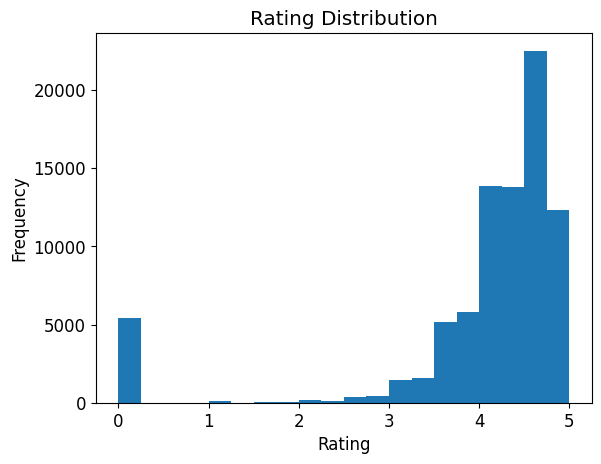

In [ ]:
Udemy_df['rating'].plot(kind='hist',bins=20,title='Rating Distribution')
plt.xlabel('Rating')
plt.show()

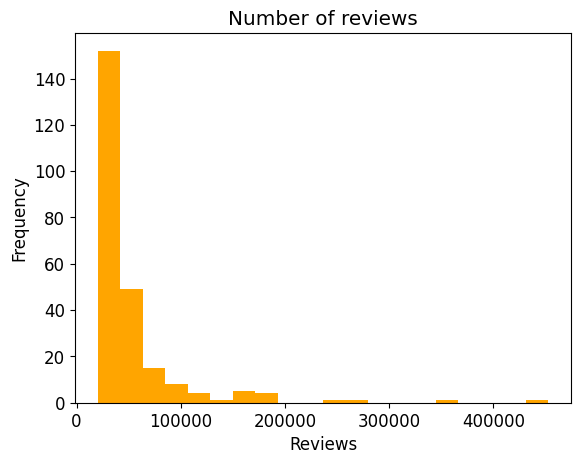

In [ ]:
Udemy_df.query('num_reviews >20000 ')['num_reviews'].plot(kind='hist',bins=20,title='Number of reviews',color='orange')
plt.xlabel('Reviews')
plt.show()

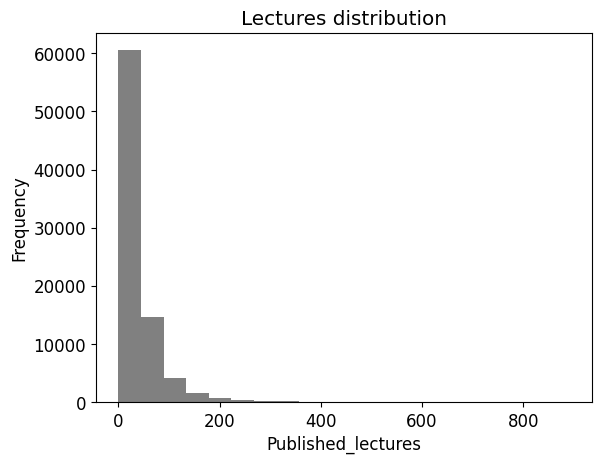

In [ ]:
Udemy_df['num_published_lectures'].plot(kind='hist',bins=20,title='Lectures distribution',color='grey')
plt.xlabel('Published_lectures')
plt.show()

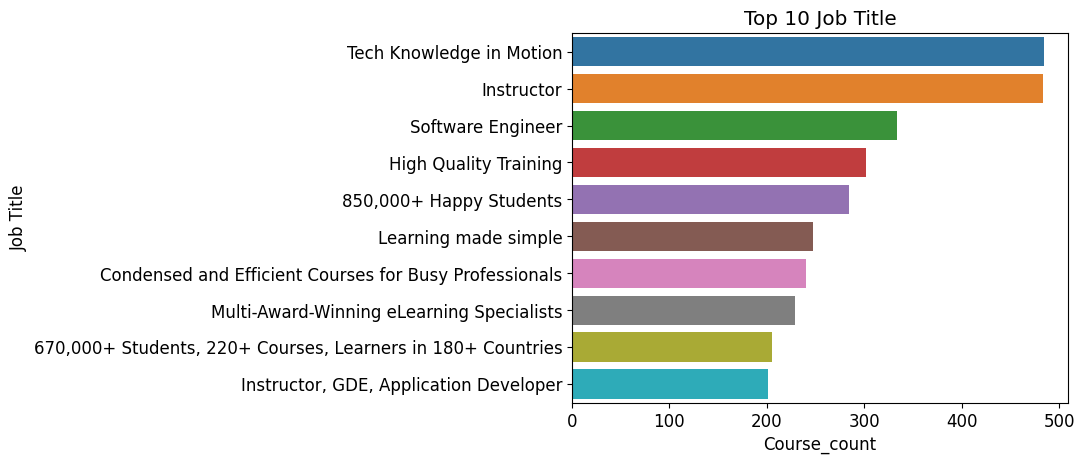

In [ ]:
Top10_jobtitle=Udemy_df['job_title'].value_counts()[:10].reset_index().rename(columns={'index':'job_title','job_title':'Course_count'})

sns.barplot(data=Top10_jobtitle,y='job_title',x='Course_count')
plt.title('Top 10 Job Title')
plt.ylabel('Job Title')
plt.xlabel('Course_count')
plt.show()

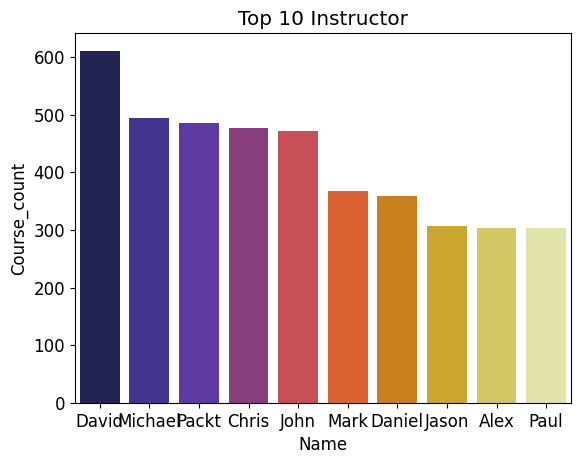

In [ ]:
Top10_instructor=Udemy_df['name'].value_counts()[:10].reset_index().rename(columns={'index':'Name','name':'Course_count'})

sns.barplot(data=Top10_instructor,y='Course_count',x='Name',palette='CMRmap')
plt.title('Top 10 Instructor')
plt.show()


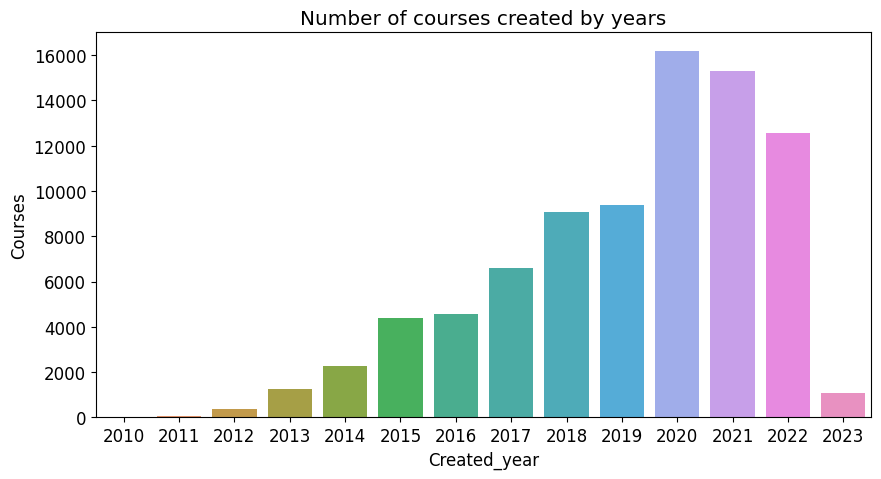

In [ ]:
plt.figure(figsize=(10,5))
createdyearby_courses=Udemy_df['created_year'].value_counts().reset_index()\
                                              .rename(columns={'index':'Created_year','created_year':'Courses'})

sns.barplot(data=createdyearby_courses,x='Created_year',y='Courses')
plt.title('Number of courses created by years')
plt.show()

In [ ]:
corr_df=Udemy_df[['rating', 'num_reviews', 'num_published_lectures', 'created',
       'last_update_date', 'created_date', 'created_year']].corr()
corr_df

<ipython-input-130-43e011a491d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'last_update_date', 'created_date', 'created_year']].corr()


,rating,num_reviews,num_published_lectures,created_year
rating,1.000000,0.044251,0.123975,-0.178108
num_reviews,0.044251,1.000000,0.195923,-0.092895
num_published_lectures,0.123975,0.195923,1.000000,-0.086827
created_year,-0.178108,-0.092895,-0.086827,1.000000


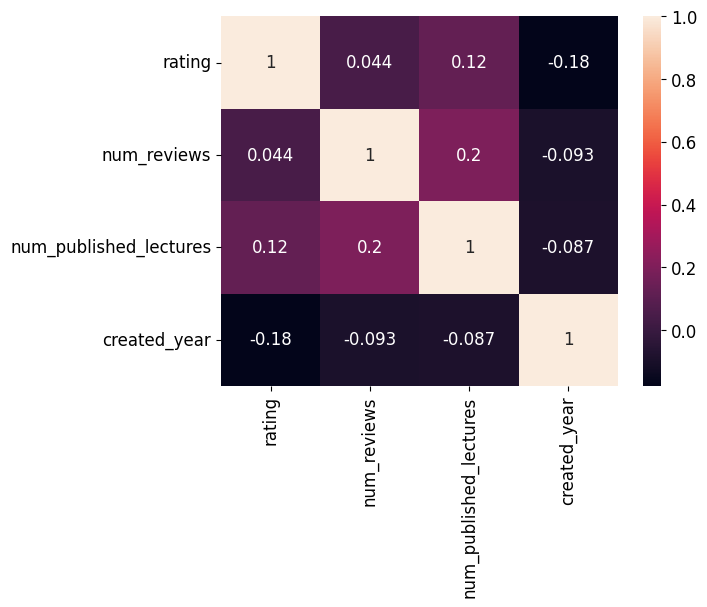

In [ ]:
sns.heatmap(data=corr_df,annot=True)
plt.show()

In [ ]:
Mostpopularcourses=Udemy_df.groupby(['courses'])[['rating','num_reviews']]\
                           .max()\
                           .sort_values(by='num_reviews',ascending=False)[:20]
Mostpopularcourses.style.background_gradient(cmap='viridis')

,rating,num_reviews
courses,,
The Complete Python Bootcamp From Zero to Hero in Python,4.600000,452973
Microsoft Excel - Excel from Beginner to Advanced,4.700000,357442
The Complete 2023 Web Development Bootcamp,4.700000,263152
The Web Developer Bootcamp 2023,4.700000,254711
Angular - The Complete Guide (2023 Edition),4.600000,180257
100 Days of Code: The Complete Python Pro Bootcamp for 2023,4.700000,177568
Java Programming Masterclass updated to Java 17,4.600000,177184
"React - The Complete Guide (incl Hooks, React Router, Redux)",4.600000,176452
Ultimate AWS Certified Solutions Architect Associate SAA-C03,4.700000,168032


In [ ]:
MostPopulerInstuctor=Udemy_df.groupby(['full_name','courses'])[['rating','num_reviews']]\
                             .max()\
                             .sort_values(by='num_reviews',ascending=False)[:20]

MostPopulerInstuctor.style.background_gradient(cmap='viridis')

,,rating,num_reviews
full_name,courses,,
Jose Portilla,The Complete Python Bootcamp From Zero to Hero in Python,4.600000,452973
Kyle Pew,Microsoft Excel - Excel from Beginner to Advanced,4.700000,357442
Dr. Angela Yu,The Complete 2023 Web Development Bootcamp,4.700000,263152
Colt Steele,The Web Developer Bootcamp 2023,4.700000,254711
Maximilian Schwarzmüller,Angular - The Complete Guide (2023 Edition),4.600000,180257
Dr. Angela Yu,100 Days of Code: The Complete Python Pro Bootcamp for 2023,4.700000,177568
Tim Buchalka,Java Programming Masterclass updated to Java 17,4.600000,177184
Academind by Maximilian Schwarzmüller,"React - The Complete Guide (incl Hooks, React Router, Redux)",4.600000,176452
"Stephane Maarek | AWS Certified Cloud Practitioner,Solutions Architect,Developer",Ultimate AWS Certified Solutions Architect Associate SAA-C03,4.700000,168032


In [ ]:
coursespopularbyinstructor=Udemy_df.groupby('courses')[['full_name','rating','num_reviews','num_published_lectures']]\
                                   .max()\
                                   .sort_values(['rating','num_reviews'],ascending=False)[:20]
coursespopularbyinstructor.style.background_gradient(cmap='viridis')

,full_name,rating,num_reviews,num_published_lectures
courses,,,,
The Complete ARKit Course - Build 11 Augmented Reality Apps,Codestars • over 2 million students worldwide!,5.000000,2234,94
Abdomen Definido y Fuerte - Buff Academy,Vadym Cavalera,5.000000,1468,11
StichMethod Blues Master Class Part 1.,Ian Stich,5.000000,1182,6
"Reiki, Usui, Kahuna, Tibetano - Nível 3A",Joao Caputo e Oliveira,5.000000,1125,15
Lower Back Pain: Relaxation and Therapeutic Exercise,Uzzal's Learning School,5.000000,1042,34
3D Modeling Piped Systems in AutoCAD,Paul Lynn,5.000000,942,77
Forex & Financial Market Trading Tutorial- Online Strategies,PFOREX COM,5.000000,941,69
IEC Paradigms (Level 4),Paul Lynn,5.000000,914,111
Creare video con la fotocamera Reflex,Davide Vasta,5.000000,851,18


In [ ]:
Udemy_df['created_monthname'] = pd.Categorical(Udemy_df['created_monthname'],categories=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'],ordered=True)
Monthwise_No_of_reviews=Udemy_df.groupby('created_monthname')['num_reviews'].sum().reset_index().sort_values(by='created_monthname',ascending=True)

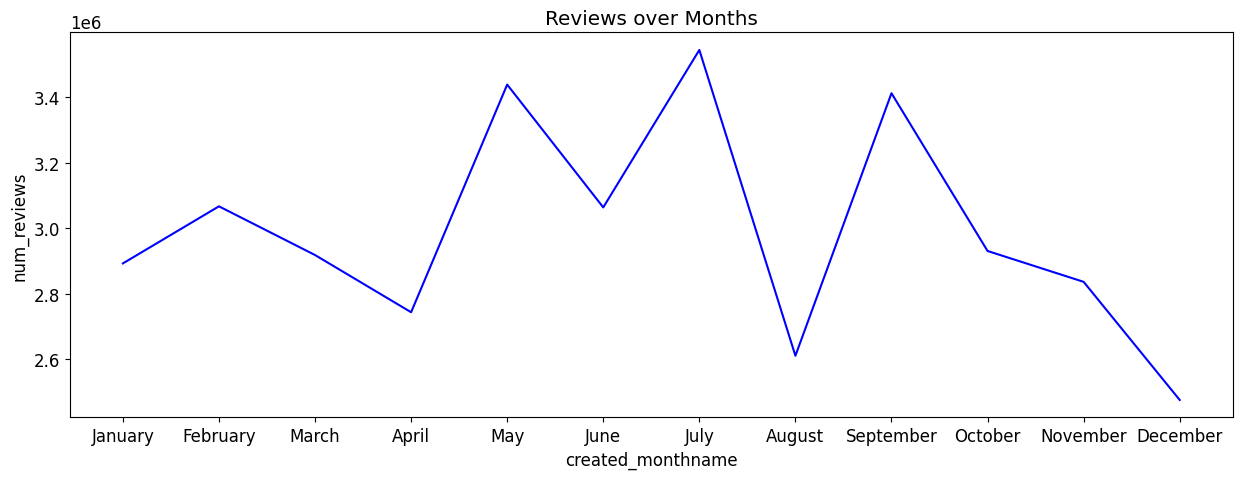

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='created_monthname',y='num_reviews',data=Monthwise_No_of_reviews,color='blue')
plt.title('Reviews over Months')
plt.show()